# Potwierdzam samodzielność powyższej pracy oraz niekorzystanie przeze mnie z niedozwolonych źródeł. Olaf Werner

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import RegularPolygon
import matplotlib.cm as cm

# Kohen RUN THIS

In [7]:
np.random.seed(123)

In [8]:
def gaussian_formal(x,y,x_0=0,y_0=0,sigx=1,sigy=1,A=1):
    return A*np.exp(-(((x-x_0)**2)/(2*sigx**2)+((y-y_0)**2)/(2*sigy**2)))

In [9]:
def gaussian(d,t):
    d=d*t
    return np.exp(-(d**2))

## second derivative of gaussian

In [66]:
def mexican_hat(d,t):
    d=d*t
    return (2-4*d**2)*np.exp(-(d**2))

In [11]:
def exp_res(t,lambd):
    return np.exp(-t/lambd)

In [448]:
class Kohen:
    def __init__(self,M,N):
        self.Neurons=[[0]*N for x in range(M)]
        
    def euclidean(self,x,y):
        return np.sqrt(np.sum((x-y)**2))
    
    def train(self,Data,lambd,neighbour_fun,learning_res,scale_x=1,scale_y=1,hexagon_grid=False):
        #initaite with random vectors
        for x in range(len(self.Neurons)):
            for y in range(len(self.Neurons[0])):
                self.Neurons[x][y]=np.random.random(Data.shape[1])*2-1
                
        for s in range(1,lambd):
            for t in range(Data.shape[0]):
                #find BMU
                D=Data[t]
                BMU_x=0
                BMU_y=0
                BMU_value=self.euclidean(self.Neurons[BMU_x][BMU_y],D)
                for x in range(len(self.Neurons)):
                    for y in range(len(self.Neurons[0])):
                        D_t=self.euclidean(self.Neurons[x][y],D)
                        if D_t<BMU_value:
                            BMU_value=D_t
                            BMU_x=x
                            BMU_y=y
                            
                #update
                for x in range(len(self.Neurons)):
                    for y in range(len(self.Neurons[0])):
                        if hexagon_grid:
                            d=np.sqrt(((y-BMU_y)*1.5*scale_y)**2+3*(((BMU_x+BMU_y//2)-(x+y//2)-(y-BMU_y)/2)*scale_x)**2)
                            
                        else:
                            d=np.sqrt((scale_x*(x-BMU_x))**2+(scale_y*(y-BMU_y))**2)
                        
                        self.Neurons[x][y]=self.Neurons[x][y]+neighbour_fun(d,s)*learning_res(s,lambd)*(D-self.Neurons[x][y])
                
    def hexagonal_cord(self,Data):
        d=Data.copy()
        d[:,0]=d[:,0]+d[:,1]//2
        output=output=np.zeros((Data.shape[0],3))
        output[:,0]=d[:,0]
        output[:,1]=d[:,1]-d[:,0]
        output[:,2]=-d[:,1]
        return output
    
    def map_input(self,Data):
        output=np.zeros((Data.shape[0],2))
        
        for t in range(Data.shape[0]):
            #find BMU
            D=Data[t]
            BMU_x=0
            BMU_y=0
            BMU_value=self.euclidean(self.Neurons[BMU_x][BMU_y],D)
            for x in range(len(self.Neurons)):
                for y in range(len(self.Neurons[0])):
                    D_t=self.euclidean(self.Neurons[x][y],D)
                    if D_t<BMU_value:
                        BMU_value=D_t
                        BMU_x=x
                        BMU_y=y
            output[t,0]=BMU_x
            output[t,1]=BMU_y
            
        return output
    
    def map_umatrix(self,statistic="mean"):
        #,neighbour_fun,scale_x=1,scale_y=1,t=1
        output=np.zeros((len(self.Neurons)*2-1,len(self.Neurons[0])*2-1))
        for x in range(len(self.Neurons)):
            for y in range(len(self.Neurons[0])):
                d=[]
                for i in range(-1,2):
                    for j in range(-1,2):
                        if 0<=2*x+i<2*len(self.Neurons)-1 and 0<=2*y+j<2*len(self.Neurons[0])-1 and not (x+i==x and y+j==y):
                            temp=self.euclidean(self.Neurons[x+i][y+j],self.Neurons[x][y])
                            output[2*x+i,2*y+j]=temp
                            d.append(temp)
                if statistic=="mean":
                    output[2*x,2*y]=np.mean(d)
                if statistic=="min":
                    output[2*x,2*y]=np.min(d)
                if statistic=="median":
                    output[2*x,2*y]=np.median(d)
            
        return output
    
    def map_distance(self,statistic="mean"):
        #,neighbour_fun,scale_x=1,scale_y=1,t=1
        output=np.zeros((len(self.Neurons),len(self.Neurons[0])))
        for x in range(len(self.Neurons)):
            for y in range(len(self.Neurons[0])):
                d=[]
                for i in range(-1,2):
                    for j in range(-1,2):
                        if 0<=x+i<len(self.Neurons) and 0<=y+j<len(self.Neurons[0]) and not (x+i==x and y+j==y):
                            temp=self.euclidean(self.Neurons[x+i][y+j],self.Neurons[x][y])
                            d.append(temp)
                if statistic=="mean":
                    output[x,y]=np.mean(d)
                if statistic=="min":
                    output[x,y]=np.min(d)
                if statistic=="median":
                    output[x,y]=np.median(d)
            
        return output

## CUBE dataset

## initiate and train SOM on random subset 

In [449]:
Map_test=Kohen(6,6)

In [450]:
test = np.loadtxt("mio2/cube.csv", delimiter=',', skiprows=1, usecols=range(0,3))
np.random.shuffle(test)
X=test[:,0:3]
train_input_layer=(X-np.mean(X,axis=0))/np.std(X,axis=0)

In [451]:
Map_test.train(train_input_layer[::5,:],5,gaussian,exp_res,hexagon_grid=True)

## weights of neurons

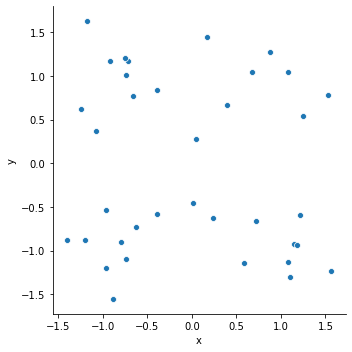

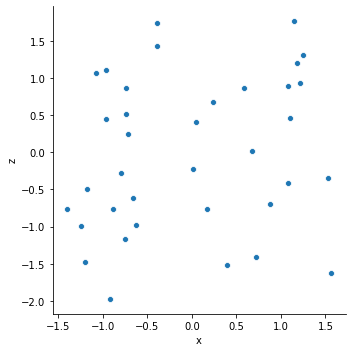

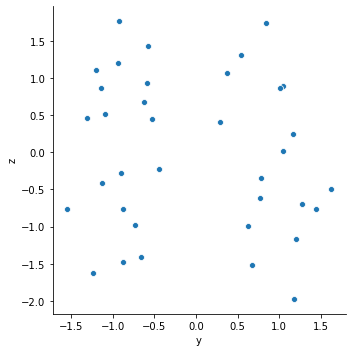

In [452]:
output=np.zeros((len(Map_test.Neurons)*len(Map_test.Neurons[0]),5))
i=0
for x in range(len(Map_test.Neurons)):
    for y in range(len(Map_test.Neurons[0])):
        output[i,0]=x
        output[i,1]=y
        output[i,2]=Map_test.Neurons[x][y][0]
        output[i,3]=Map_test.Neurons[x][y][1]
        output[i,4]=Map_test.Neurons[x][y][2]
        i+=1

network=pd.DataFrame(output,columns=["map_x","map_y","x","y","z"])

sns.relplot(x="x",y="y",data=network,kind="scatter",palette=sns.color_palette("Set1", 8))
sns.relplot(x="x",y="z",data=network,kind="scatter",palette=sns.color_palette("Set1", 8))
sns.relplot(x="y",y="z",data=network,kind="scatter",palette=sns.color_palette("Set1", 8))

We can see that weights are split into diffrent, lineary separable clusters

## map neurons indices

In [453]:
test=pd.read_csv("mio2/cube.csv")

test_input_layer=test[["x","y","z"]].to_numpy()

test_input_layer=(test_input_layer-np.mean(test_input_layer,axis=0))/np.std(test_input_layer,axis=0)

map_neurons=Map_test.map_input(test_input_layer)

test["map_x"]=map_neurons[:,0]

test["map_y"]=map_neurons[:,1]

test["map_x_r"]=map_neurons[:,0]+np.random.random(test.shape[0])/4

test["map_y_r"]=map_neurons[:,1]+np.random.random(test.shape[0])/4

test["c"]=test.c.astype(str)

In [454]:
hexy=Map_test.hexagonal_cord(np.unique(map_neurons,axis=0))

In [455]:
kolor=np.random.random(hexy.shape[0])

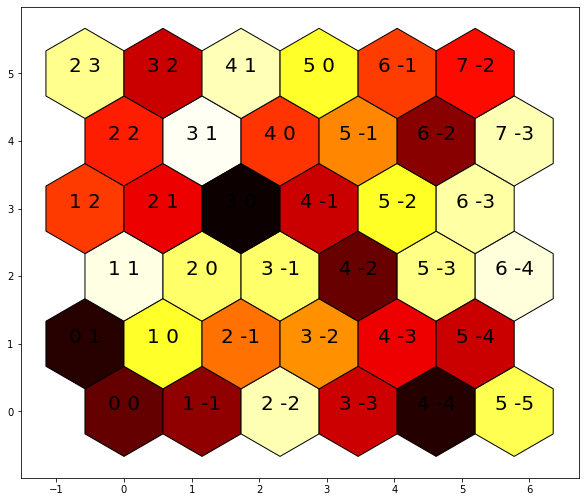

In [462]:
coord = hexy
colors = kolor

# Horizontal cartesian coords
hcoord = [c[0] for c in coord]

# Vertical cartersian coords
vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]

hcoord2=[np.cos(np.radians(-30))*hcoord[x]+np.sin(np.radians(-30))*vcoord[x] for x in range(len(hcoord))]
vcoord2=[-np.sin(np.radians(-30))*hcoord[x]+np.cos(np.radians(-30))*vcoord[x] for x in range(len(hcoord))]

hcoord=hcoord2
vcoord=vcoord2

i=0

fig, ax = plt.subplots(1,figsize=(10,10))
ax.set_aspect('equal')

# Add some coloured hexagons
for x, y, c in zip(hcoord, vcoord, colors):
    color = cm.hot(c) # matplotlib understands lower case words for colours
    hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., 
                         orientation=np.radians(60), 
                         facecolor=color, edgecolor='k')
    ax.add_patch(hex)
    # Also add a text label
    ax.text(x, y+0.1, str(int(coord[i,0]))+" "+str(int(coord[i,1])), ha='center', va='center', size=20)
    i+=1
# Also add scatter points in hexagon centres
ax.scatter(hcoord, vcoord, c=[cm.hot(c) for c in colors])

# visualizations

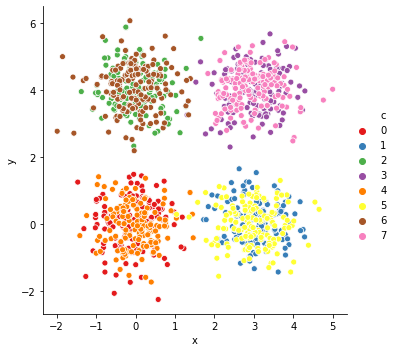

In [619]:
sns.relplot(x="x",y="y",data=test,kind="scatter",hue="c",palette=sns.color_palette("Set1", 8))

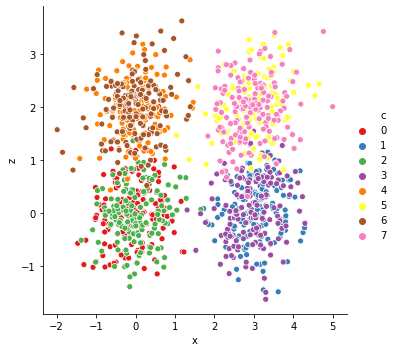

In [620]:
sns.relplot(x="x",y="z",data=test,kind="scatter",hue="c",palette=sns.color_palette("Set1", 8))

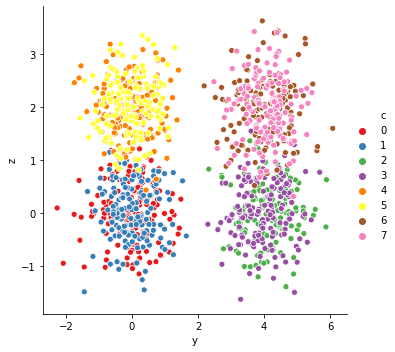

In [621]:
sns.relplot(x="y",y="z",data=test,kind="scatter",hue="c",palette=sns.color_palette("Set1", 8))

## classes and BMU of each input

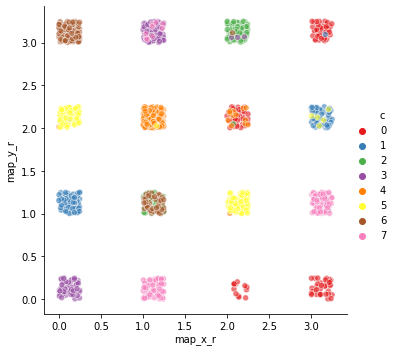

In [622]:
sns.relplot(x="map_x_r",y="map_y_r",hue="c",data=test,kind="scatter",palette=sns.color_palette("Set1", 8),alpha=0.6)

We see that our map has found right amount of clusters, but some are not pure

## U Matrix

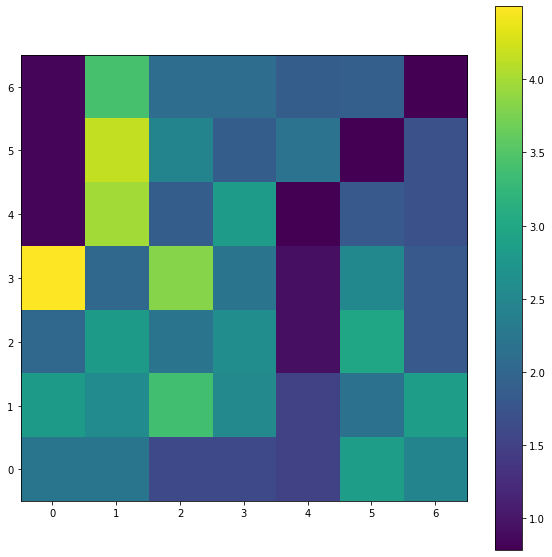

In [623]:
plt.figure(figsize=(10,10))
plt.imshow(Map_test.map_umatrix(statistic="min"))
plt.viridis()
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

Darker regions are places where neurons are close to each other, we can see cluster in left upper corner

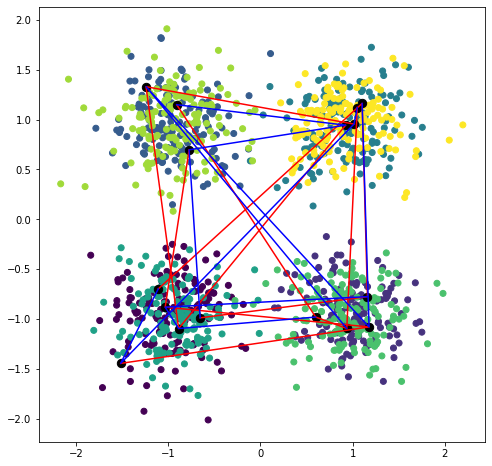

In [624]:
plt.figure(figsize=(8,8))
for row in range(len(Map_test.Neurons)):
    plt.plot(network[network.map_x==row].x,network[network.map_x==row].y,color="red")
for col in range(len(Map_test.Neurons[0])):
    plt.plot(network[network.map_y==col].x,network[network.map_y==col].y,color="blue")
    
plt.scatter(test_input_layer[:,0],test_input_layer[:,1],c=test.c.to_numpy().astype(int))
plt.scatter(network.x,network.y,color="black",s=70)

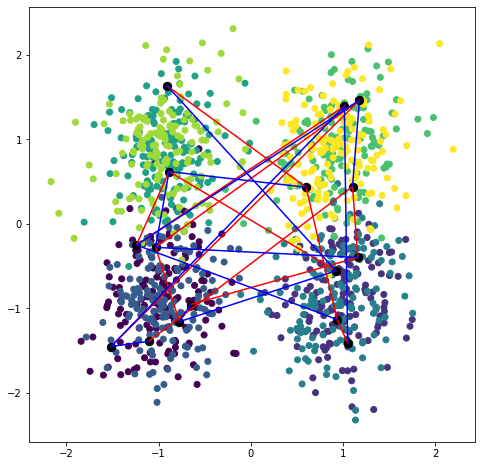

In [625]:
plt.figure(figsize=(8,8))
for row in range(len(Map_test.Neurons)):
    plt.plot(network[network.map_x==row].x,network[network.map_x==row].z,color="red")
for col in range(len(Map_test.Neurons[0])):
    plt.plot(network[network.map_y==col].x,network[network.map_y==col].z,color="blue")
    
plt.scatter(test_input_layer[:,0],test_input_layer[:,2],c=test.c.to_numpy().astype(int))
plt.scatter(network.x,network.z,color="black",s=70)

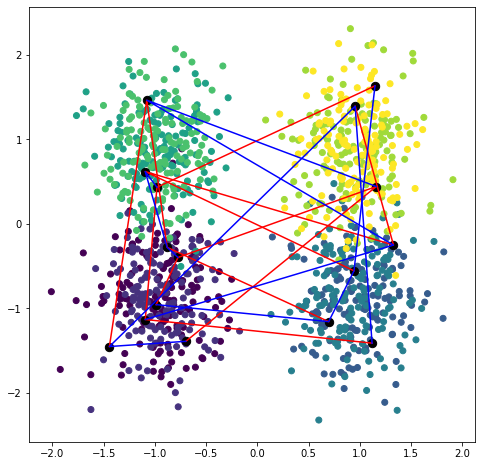

In [626]:
plt.figure(figsize=(8,8))
for row in range(len(Map_test.Neurons)):
    plt.plot(network[network.map_x==row].y,network[network.map_x==row].z,color="red")
for col in range(len(Map_test.Neurons[0])):
    plt.plot(network[network.map_y==col].y,network[network.map_y==col].z,color="blue")
    
plt.scatter(test_input_layer[:,1],test_input_layer[:,2],c=test.c.to_numpy().astype(int))
plt.scatter(network.y,network.z,color="black",s=70)

As expected our weights are close to center of clusters, red lines denote neighbourhood by row, blue lines denote neighbourhood by column

## HEXAGON dataset

## initiate and train SOM on random subset 

In [628]:
Map_test=Kohen(3,2)

In [629]:
test = np.loadtxt("mio2/hexagon.csv", delimiter=',', skiprows=1, usecols=range(0,2))
np.random.shuffle(test)
X=test[:,0:2]
train_input_layer=(X-np.mean(X,axis=0))/np.std(X,axis=0)

In [630]:
Map_test.train(train_input_layer[::5,:],100,gaussian,exp_res)

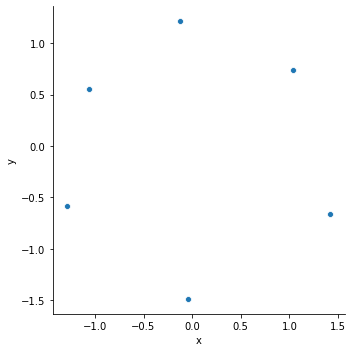

In [631]:
output=np.zeros((len(Map_test.Neurons)*len(Map_test.Neurons[0]),4))
i=0
for x in range(len(Map_test.Neurons)):
    for y in range(len(Map_test.Neurons[0])):
        output[i,0]=x
        output[i,1]=y
        output[i,2]=Map_test.Neurons[x][y][0]
        output[i,3]=Map_test.Neurons[x][y][1]
        i+=1

network=pd.DataFrame(output,columns=["map_x","map_y","x","y"])

sns.relplot(x="x",y="y",data=network,kind="scatter",palette=sns.color_palette("Set1", 6))

We see that weights make circle.

## map neurons indices

In [632]:
test=pd.read_csv("mio2/hexagon.csv")

test_input_layer=test[["x","y"]].to_numpy()

test_input_layer=(test_input_layer-np.mean(test_input_layer,axis=0))/np.std(test_input_layer,axis=0)

map_neurons=Map_test.map_input(test_input_layer)

test["map_x"]=map_neurons[:,0]

test["map_y"]=map_neurons[:,1]

test["map_x_r"]=map_neurons[:,0]+np.random.random(test.shape[0])/4

test["map_y_r"]=map_neurons[:,1]+np.random.random(test.shape[0])/4

test["c"]=test.c.astype(str)

# visualizations

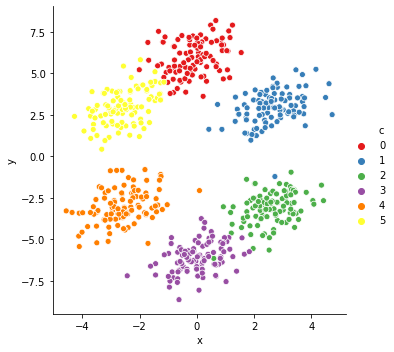

In [633]:
sns.relplot(x="x",y="y",data=test,kind="scatter",hue="c",palette=sns.color_palette("Set1", 6))

## classes and BMU of each input

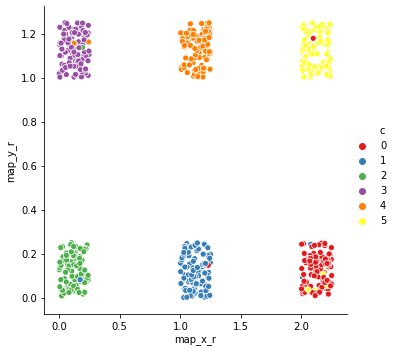

In [634]:
sns.relplot(x="map_x_r",y="map_y_r",hue="c",data=test,kind="scatter",palette=sns.color_palette("Set1", 6))

Right amount of clusters and quite pure ones.

## U Matrix

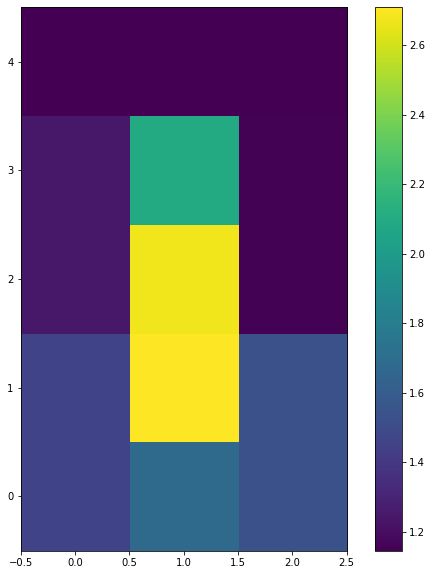

In [635]:
plt.figure(figsize=(10,10))
plt.imshow(Map_test.map_umatrix(statistic="min"))
plt.viridis()
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

U matrix also makes a circle.

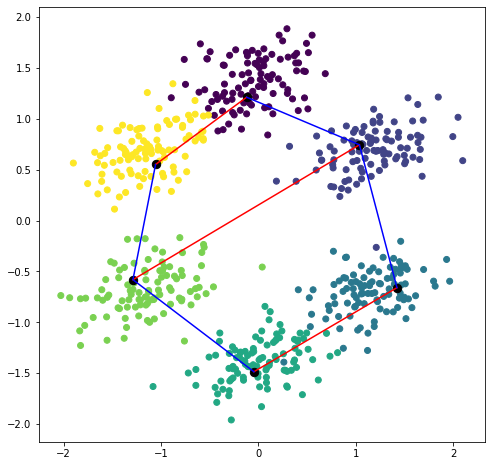

In [636]:
plt.figure(figsize=(8,8))
for row in range(len(Map_test.Neurons)):
    plt.plot(network[network.map_x==row].x,network[network.map_x==row].y,color="red")
for col in range(len(Map_test.Neurons[0])):
    plt.plot(network[network.map_y==col].x,network[network.map_y==col].y,color="blue")
    
plt.scatter(test_input_layer[:,0],test_input_layer[:,1],c=test.c.to_numpy().astype(int))
plt.scatter(network.x,network.y,color="black",s=70)

Weights are in center of clusters

# effects of scaling neighborhood width and changing neighbourhood function

In [193]:
def mexican_hat(d,t):
    d=d*t*4
    return (2-4*d**2)*np.exp(-(d**2))

In [195]:
Map_start=Kohen(4,4)

In [196]:
test = np.loadtxt("mio2/hexagon.csv", delimiter=',', skiprows=1, usecols=range(0,2))
np.random.shuffle(test)
X=test[:,0:2]
train_input_layer=(X-np.mean(X,axis=0))/np.std(X,axis=0)

In [197]:
Map_gauss_1=Kohen(4,4)

Map_gauss_1.Neurons=Map_start.Neurons.copy()

Map_gauss_1.train(train_input_layer[::4,:],50,gaussian,exp_res)

output=np.zeros((len(Map_start.Neurons)*len(Map_start.Neurons[0]),5))
i=0
for x in range(len(Map_start.Neurons)):
    for y in range(len(Map_start.Neurons[0])):
        output[i,0]=x
        output[i,1]=y
        output[i,2]=Map_gauss_1.Neurons[x][y][0]
        output[i,3]=Map_gauss_1.Neurons[x][y][1]
        output[i,4]=1
        i+=1

network=pd.DataFrame(output,columns=["map_x","map_y","x","y","x_scale"])
network["function"]="gauss"

In [198]:
Map_gauss_01=Kohen(4,4)

Map_gauss_01.Neurons=Map_start.Neurons.copy()

Map_gauss_01.train(train_input_layer[::4,:],50,gaussian,exp_res,scale_x=0.1)

output=np.zeros((len(Map_start.Neurons)*len(Map_start.Neurons[0]),5))
i=0
for x in range(len(Map_start.Neurons)):
    for y in range(len(Map_start.Neurons[0])):
        output[i,0]=x
        output[i,1]=y
        output[i,2]=Map_gauss_01.Neurons[x][y][0]
        output[i,3]=Map_gauss_01.Neurons[x][y][1]
        output[i,4]=0.1
        i+=1

network1=pd.DataFrame(output,columns=["map_x","map_y","x","y","x_scale"])
network1["function"]="gauss"
network=network.append(network1,ignore_index=True)

In [199]:
Map_gauss_05=Kohen(6,6)

Map_gauss_05.Neurons=Map_start.Neurons.copy()

Map_gauss_05.train(train_input_layer[::4,:],50,gaussian,exp_res,scale_x=0.5)

output=np.zeros((len(Map_start.Neurons)*len(Map_start.Neurons[0]),5))
i=0
for x in range(len(Map_start.Neurons)):
    for y in range(len(Map_start.Neurons[0])):
        output[i,0]=x
        output[i,1]=y
        output[i,2]=Map_gauss_05.Neurons[x][y][0]
        output[i,3]=Map_gauss_05.Neurons[x][y][1]
        output[i,4]=0.5
        i+=1

network1=pd.DataFrame(output,columns=["map_x","map_y","x","y","x_scale"])
network1["function"]="gauss"
network=network.append(network1,ignore_index=True)

In [200]:
Map_mexican_hat_1=Kohen(4,4)

Map_mexican_hat_1.Neurons=Map_start.Neurons.copy()

Map_mexican_hat_1.train(train_input_layer[::4,:],50,mexican_hat,exp_res)

output=np.zeros((len(Map_start.Neurons)*len(Map_start.Neurons[0]),5))
i=0
for x in range(len(Map_start.Neurons)):
    for y in range(len(Map_start.Neurons[0])):
        output[i,0]=x
        output[i,1]=y
        output[i,2]=Map_mexican_hat_1.Neurons[x][y][0]
        output[i,3]=Map_mexican_hat_1.Neurons[x][y][1]
        output[i,4]=1
        i+=1

network1=pd.DataFrame(output,columns=["map_x","map_y","x","y","x_scale"])
network1["function"]="mexican_hat"
network=network.append(network1,ignore_index=True)

In [201]:
network

,map_x,map_y,x,y,x_scale,function
0,0.0,0.0,0.718923,-0.859316,1.0,gauss
1,0.0,1.0,1.336206,-0.881778,1.0,gauss
2,0.0,2.0,1.151548,-0.561810,1.0,gauss
3,0.0,3.0,1.930003,-0.382739,1.0,gauss
4,1.0,0.0,-1.654379,-0.692081,1.0,gauss
...,...,...,...,...,...,...
59,2.0,3.0,-0.522131,-5.960775,1.0,mexican_hat
60,3.0,0.0,-14.342011,0.423001,1.0,mexican_hat
61,3.0,1.0,70965.359588,38132.744258,1.0,mexican_hat
62,3.0,2.0,2.485429,-6.758305,1.0,mexican_hat


In [643]:
Map_mexican_hat_01=Kohen(4,4)

Map_mexican_hat_01.Neurons=Map_start.Neurons.copy()

Map_mexican_hat_01.train(train_input_layer[::4,:],50,mexican_hat,exp_res,scale_x=0.1)

output=np.zeros((len(Map_start.Neurons)*len(Map_start.Neurons[0]),5))
i=0
for x in range(len(Map_start.Neurons)):
    for y in range(len(Map_start.Neurons[0])):
        output[i,0]=x
        output[i,1]=y
        output[i,2]=Map_mexican_hat_01.Neurons[x][y][0]
        output[i,3]=Map_mexican_hat_01.Neurons[x][y][1]
        output[i,4]=0.1
        i+=1

network1=pd.DataFrame(output,columns=["map_x","map_y","x","y","x_scale"])
network1["function"]="mexican_hat"
network=network.append(network1,ignore_index=True)

/home/olaf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/olaf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in add


In [644]:
Map_mexican_hat_05=Kohen(4,4)

Map_mexican_hat_05.Neurons=Map_start.Neurons.copy()

Map_mexican_hat_05.train(train_input_layer[::4,:],50,mexican_hat,exp_res,scale_x=0.5)

output=np.zeros((len(Map_start.Neurons)*len(Map_start.Neurons[0]),5))
i=0
for x in range(len(Map_start.Neurons)):
    for y in range(len(Map_start.Neurons[0])):
        output[i,0]=x
        output[i,1]=y
        output[i,2]=Map_mexican_hat_05.Neurons[x][y][0]
        output[i,3]=Map_mexican_hat_05.Neurons[x][y][1]
        output[i,4]=0.5
        i+=1

network1=pd.DataFrame(output,columns=["map_x","map_y","x","y","x_scale"])
network1["function"]="mexican_hat"
network=network.append(network1,ignore_index=True)

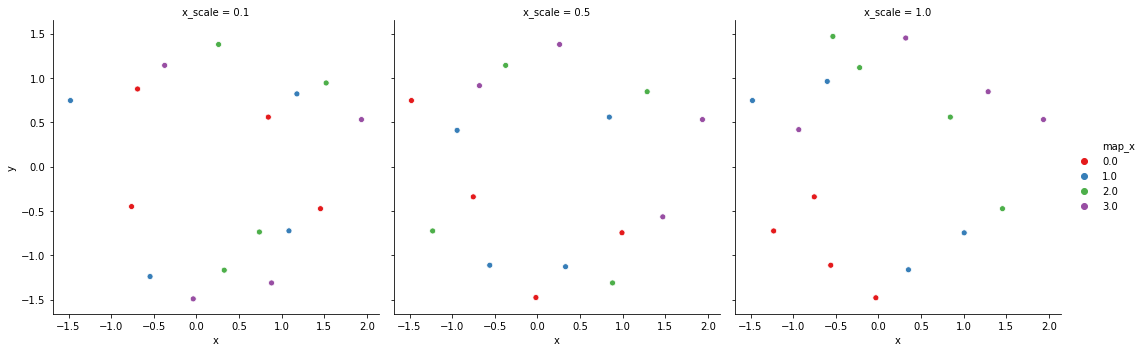

In [645]:
sns.relplot(x="x",y="y",data=network[network.function=="gauss"],hue="map_x",col="x_scale",palette=sns.color_palette("Set1", 4))

We can see that when x is scaled, points of the same color are more spread from each other, thats because, when calculating neighbourhood function x axis is less importent.

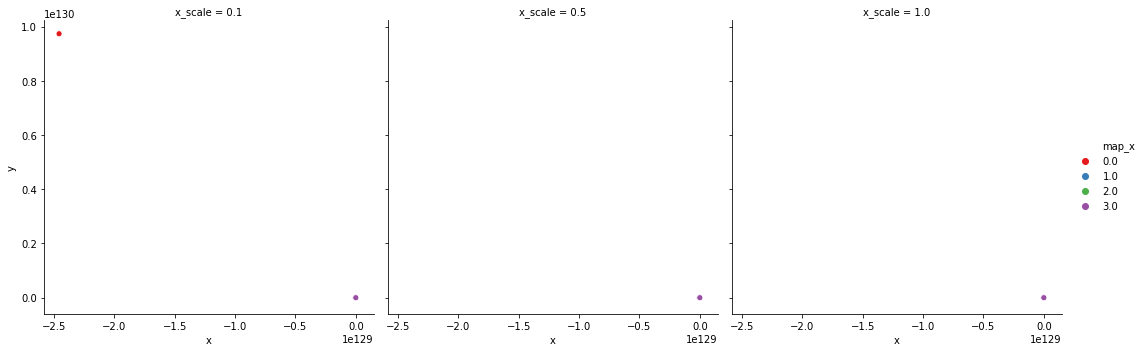

In [647]:
sns.relplot(x="x",y="y",data=network[network.function=="mexican_hat"],hue="map_x",col="x_scale",palette=sns.color_palette("Set1", 4))

Mexican_hat function is very unstable, maybe lambda was too big?